File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0000.txt                  2022-11-24 11:23:12     91741530
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0001.txt                  2022-11-24 11:23:18     92793422
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0002.txt                  2022-11-24 11:23:26     95576204
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0003.txt                  2022-11-24 11:23:34     96033702
File Name                                             Modified             Size
Mg_1_maalning_dag2_ch0004.txt                  2022-11-24 11:23:40     95900857
File: 0
File: 1
File: 2
File: 3
File: 4


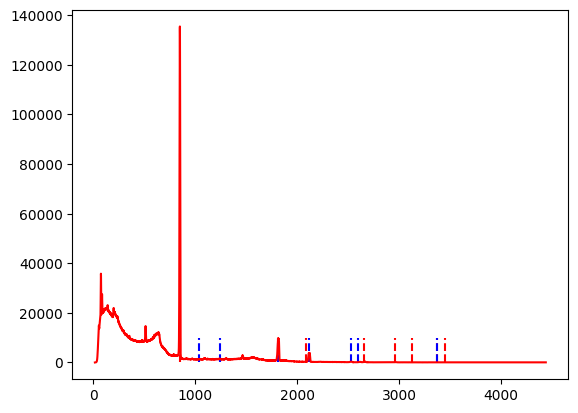

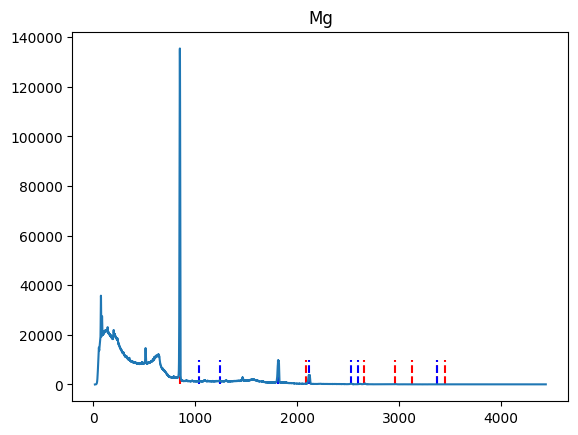

In [280]:
import numpy as np
import pandas as pd
import glob
import os
import scipy.stats as ss
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from zipfile import ZipFile


  
#specifying the zip file name
for i in range(5):
    file_name = f'Dag 2/Mg_data/Mg_1_maalning_dag2_ch000{i}.zip'
    
    # opening the zip file in READ mode
    with ZipFile(file_name, 'r') as ti:
        # printing all the contents of the zip file
        ti.printdir()
    
        # extracting all the files
        ti.extractall()

a = 0.73971712
ae = 9.9e-7
b = 0.3785
be = 1.4e-3

# data = []
# 
#     data.append(np.loadtxt(f'Mg_1_maalning_dag2_ch000{i}.txt')[1])

def getCounts(j, lc: int = 20, hc: int = 6000):
    
    counts = []
    for i in range(j):
        print('File:', str(i))
        data = np.loadtxt(f"Mg_1_maalning_dag2_ch000{i}.txt")
        counts.append(data[:, 1])
    
    (x, y) = np.unique(np.concatenate(counts), return_counts=True)
    lI = np.where(x >= lc)[0][0]
    hI = np.where(x >= hc)[0][0]
    x = x[lI:hI]
    y = y[lI:hI]
    
    a = 0.73971712
    ae = 9.9e-7
    b = 0.3785
    be = 1.4e-3
    x  = x * a + b
    
    return (x, y)

Line = [3445.279,3369.91,3122.908,2959.935,2657.547,2085.064,846.77]
line = [2598.438, 3369.81,2523.06,1037.833,2113.092,1810.726, 1238.27]


plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')



Mg1 = getCounts(5)
# Mg2 = getCounts(1)
# Mg3 = getCounts(2)
# Mg4 = getCounts(3)
# Mg5 = getCounts(4)


# ener = np.concatenate([Mg1[0], Mg2[0] , Mg3[0] , Mg4[0] , Mg5[0]])
# Coun = np.concatenate([Mg1[1], Mg2[1] , Mg3[1] , Mg4[1] , Mg5[1]])

plt.plot(Mg1[0], Mg1[1], color="r", label="data")
plt.show()

plt.vlines(Line, 0, 10000, colors='r', linestyles='dashed')
plt.vlines(line, 0, 10000, colors='b', linestyles='dashed')

plt.plot(Mg1[0], Mg1[1])
plt.title('Mg')

plt.show()




def gaussFit(x, mu, sig, a, b, c):
    lny = np.log(a) - ((x-mu)**2)/(2*sig**2)
    return np.exp(lny) - (b*x+c)



In [281]:

def getChannel(name: str, data:tuple , lower_limit: int, upper_limit: int, x_1:int, x_2:int, guess: [int, int, int], guess2 = [0,0]):
    x = data[0][lower_limit:upper_limit]
    y = data[1][lower_limit:upper_limit]
    print('x_min',x[0],'x_max',x[-1], 'y_min',y[0],'y_max', y[-1])
    plt.plot(x, y, color="r", label="data")
    yler = np.sqrt(y)
    pinit = guess + guess2
    xhelp = np.linspace(x_1, x_2, 500)
    print('heplmin',xhelp[0],'helpmax',xhelp[-1])
    popt, pcov = curve_fit(gaussFit, x, y, p0=pinit, sigma=yler, absolute_sigma=True)
    print(name)
    print('mu :', popt[0])
    print('sigma :', popt[1])
    print('scaling', popt[2])
    print('background', popt[3], popt[4])
    perr = np.sqrt(np.diag(pcov))
    print('usikkerheder:', perr)
    chmin = np.sum(((y - gaussFit(x, *popt)) / yler) ** 2)
    print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 4))

    
    plt.plot(xhelp, gaussFit(xhelp, *popt), 'k-.', label="gaussfit")
    plt.legend()

    plt.title(name)
    plt.grid()
    plt.show()


    return [popt, perr, name]


In [282]:
def t(x):
    return int(x/ a - b)

print(Mg1[1][t(2000):t(2100) ])



[ 338  329  347  357  358  310  308  339  351  302  333  332  340  308
  315  312  314  313  291  292  293  295  263  265  290  274  295  281
  311  257  281  258  312  295  289  279  275  304  332  287  235  287
  256  262  288  294  304  277  271  282  251  293  246  267  290  281
  283  301  266  260  276  263  257  276  254  288  282  294  291  291
  305  296  257  276  286  286  264  305  255  291  280  255  291  268
  269  289  308  262  255  289  278  266  269  249  286  253  269  288
  269  254  287  259  287  281  295  326  345  332  373  352  380  396
  480  532  504  599  648  719  812  920  986 1187 1335 1391 1660 1895
 2077 2476 2575 2896 3163 3280 3620 3600 3769]


x_min 754.8899624000001 x_max 1124.00880528 y_min 3025 y_max 1417
heplmin 750.0 helpmax 1000.0
Mg E=846.77
mu : 848.2532186020449
sigma : 3.064659664501574
scaling 139794.23705509907
background 3.774630221347099 -5241.4737926815005
usikkerheder: [2.71304001e-03 2.02373820e-03 1.45595792e+02 1.88460749e-02
 1.83176359e+01]
chi2: 67680.91771201708  ---> p: 1.0


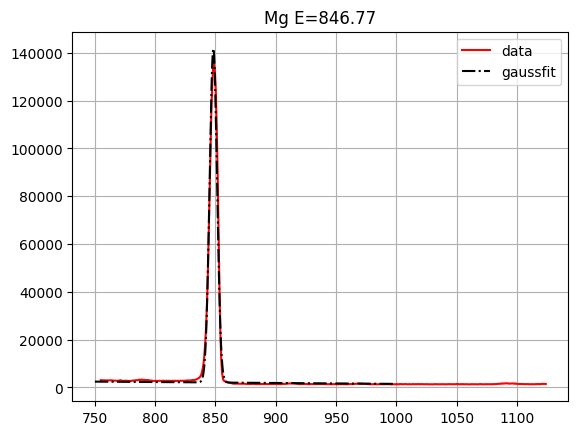

x_min 2049.3949224 x_max 2093.03823248 y_min 277 y_max 345
heplmin 2075.0 helpmax 2090.0
Mg E=2085.0
mu : 2088.27794011879
sigma : 101.59150167506074
scaling 0.0012437377684416354
background -0.2797039780953633 302.41560473013993
usikkerheder: [1.95018521e+08 6.81632265e+07 1.37283849e+03 2.42002934e+01
 5.01970927e+04]
chi2: 73.14966297223665  ---> p: 0.9999999999999951


C:\Users\David\AppData\Local\Temp\ipykernel_12664\1229430992.py:89: RuntimeWarning: invalid value encountered in log
  lny = np.log(a) - ((x-mu)**2)/(2*sig**2)


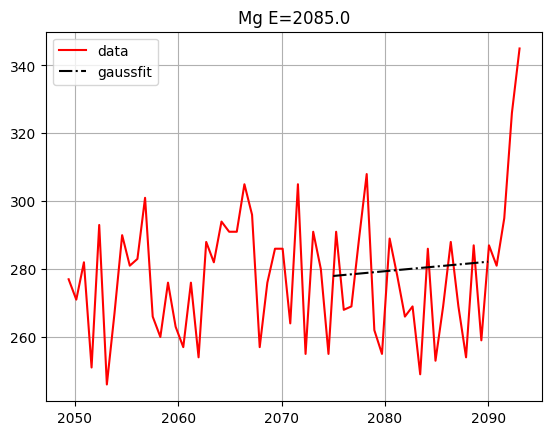

x_min 1124.7485224 x_max 1345.92394128 y_min 1459 y_max 1392
heplmin 1100.0 helpmax 1300.0
Mg E=1238.27
mu : 1240.4765345114033
sigma : 3.6382940709445704
scaling 114.44198506210164
background -0.2256757478990448 -1082.7632960504295
usikkerheder: [5.75839892e-01 5.80098739e-01 1.58993696e+01 3.32478346e-02
 4.10915529e+01]
chi2: 1668.4461647888995  ---> p: 1.0


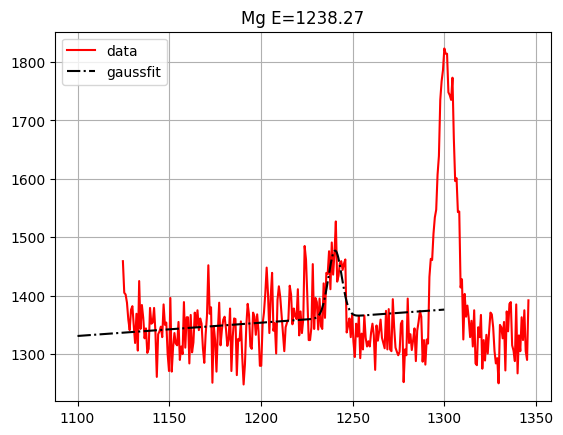

x_min 2234.3242023999996 x_max 2973.30160528 y_min 272 y_max 129
heplmin 2500.0 helpmax 2800.0
Mg E=2657.54
mu : 2662.0145384211605
sigma : 6.792252098765113
scaling 198.26287429961855
background 0.20763303208306239 -670.1207129706399
usikkerheder: [1.79395019e-01 1.65318806e-01 5.01529102e+00 1.68000230e-03
 4.51272327e+00]
chi2: 7182.550612081657  ---> p: 1.0


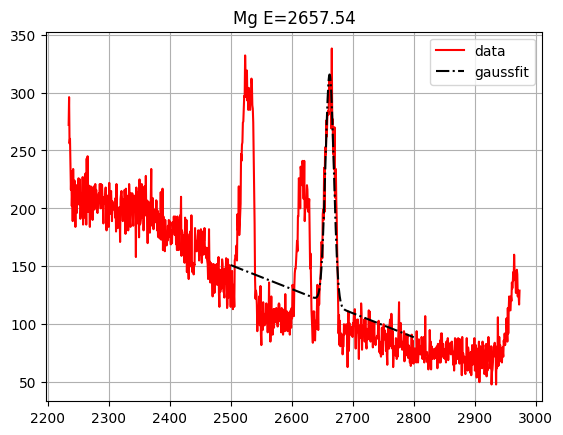

x_min 1716.5222184000002 x_max 1937.69763728 y_min 845 y_max 575
heplmin 1750.0 helpmax 1900.0
Mg E=1810.72
mu : 1813.7689684708748
sigma : 5.983160108588742
scaling 9998.664943392148
background 1.1611271271533046 -2888.9519554759368
usikkerheder: [1.59976722e-02 1.28315748e-02 2.92869501e+01 2.43607240e-02
 4.47904548e+01]
chi2: 9538.340616308775  ---> p: 1.0


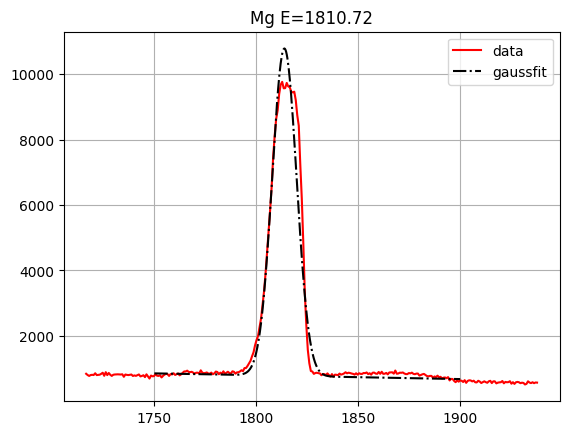

x_min 2826.0978984 x_max 3047.27331728 y_min 95 y_max 77
heplmin 2900.0 helpmax 3000.0
Mg E=2959.03
mu : 2965.7146968474426
sigma : 8.713862432071108
scaling 76.19306091763661
background 0.05536999042202279 -231.9962632171591
usikkerheder: [3.67145123e-01 3.61653797e-01 3.07764293e+00 7.78993572e-03
 2.28505479e+01]
chi2: 343.5636950255714  ---> p: 1.0


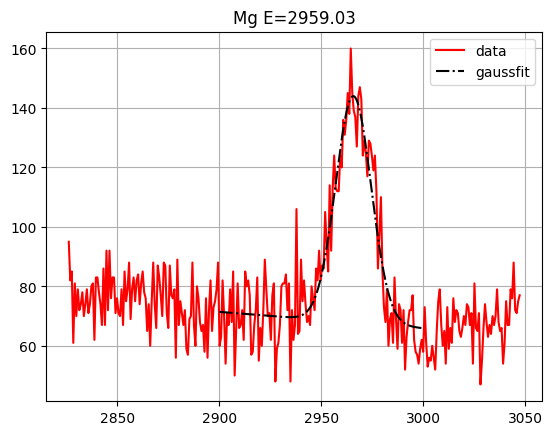

x_min 3048.0130344 x_max 3173.0252276799997 y_min 85 y_max 71
heplmin 3000.0 helpmax 3200.0
Mg E=3122.908
mu : 3110.0437652895334
sigma : 0.7827869728619642
scaling 12.387175262007364
background 0.02827813954977473 -149.35402046902414
usikkerheder: [5.46827982e-01 5.20268972e-01 7.44211079e+00 1.65385777e-02
 5.14578605e+01]
chi2: 184.1065789228315  ---> p: 1.0


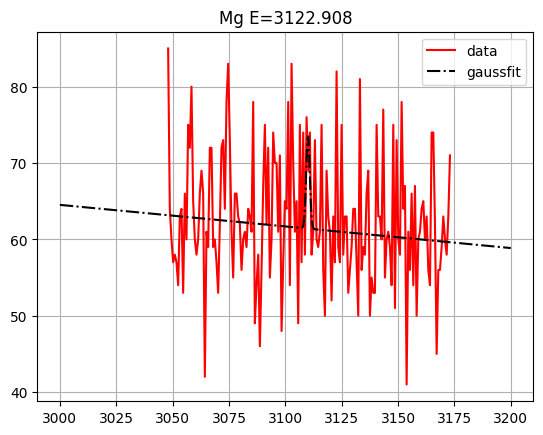

x_min 2027.2034088 x_max 2248.3788276799996 y_min 313 y_max 215
heplmin 2000.0 helpmax 2200.0
Mg E=2113.09
mu : 2116.1636655659913
sigma : 6.670799973080701
scaling 4039.7680106831854
background 0.27829958165150903 -841.4206616953652
usikkerheder: [2.61919686e-02 2.04690245e-02 1.73049196e+01 1.48010682e-02
 3.18016514e+01]
chi2: 5868.247435635777  ---> p: 1.0


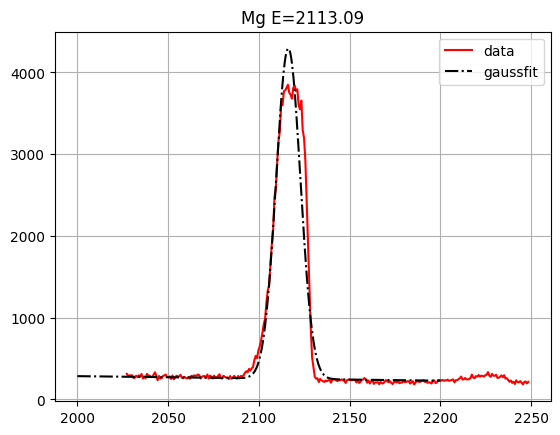

x_min 1006.3937832 x_max 1079.6257780800001 y_min 1327 y_max 1363
heplmin 1020.0 helpmax 1050.0
Mg E=1037.833
mu : 995.0416695068485
sigma : 49.17986944665532
scaling 0.005511694136255264
background 0.21641599340149112 -1547.0908726288842
usikkerheder: [8.70549753e+06 9.01099683e+06 3.35891601e+03 2.67187800e+01
 2.99582571e+04]
chi2: 90.7106664858936  ---> p: 1.0


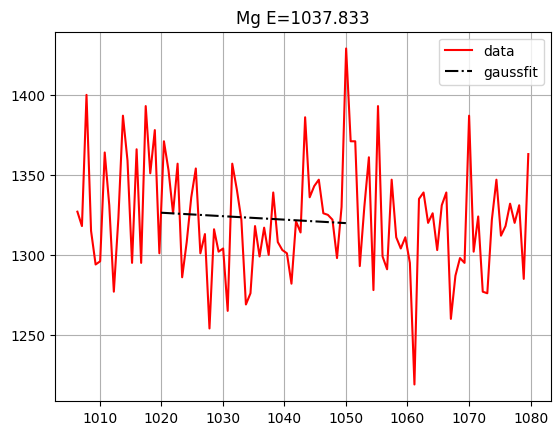

x_min 3048.0130344 x_max 4008.9055732799998 y_min 85 y_max 45
heplmin 3200.0 helpmax 3500.0
Mg E=3369.9
mu : 3377.4139578337913
sigma : 10.413147312135365
scaling 22.857397025461665
background 0.018076865978499196 -116.40700468664829
usikkerheder: [1.07156686e+00 1.03485550e+00 2.09671901e+00 7.36722933e-04
 2.63455066e+00]
chi2: 1479.872359977959  ---> p: 1.0


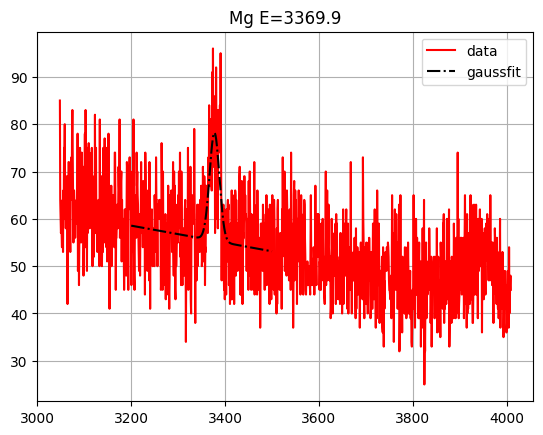

x_min 2382.2676263999997 x_max 2677.41475728 y_min 195 y_max 108
heplmin 2400.0 helpmax 2600.0
Mg E=2523.06
mu : 2526.5033341015273
sigma : 7.080453647057671
scaling 186.27362186938632
background 0.08177842274483399 -350.8370135168689
usikkerheder: [2.06328805e-01 1.92445422e-01 5.03721569e+00 7.53731445e-03
 1.91134850e+01]
chi2: 4690.492394917701  ---> p: 1.0


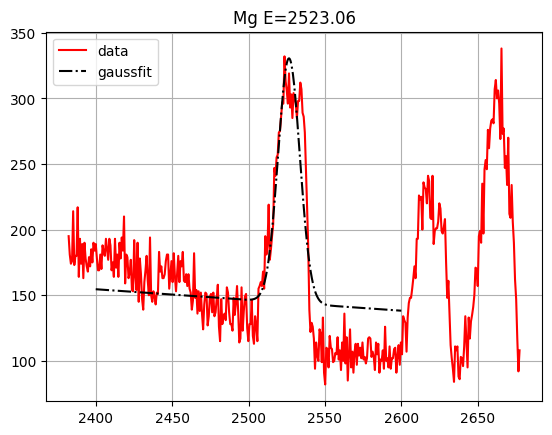

x_min 2567.1969064 x_max 2603.4430452799998 y_min 95 y_max 107
heplmin 2570.0 helpmax 2600.0
Mg E=2598.43
mu : 2582.5766523979873
sigma : 52.28258543704406
scaling 5.9701076772029384e-05
background -0.4270103953004374 998.4517207546418
usikkerheder: [3.98137973e+08 7.93558270e+07 1.81314592e+02 8.41003193e+00
 2.17694257e+04]
chi2: 45.75618193157117  ---> p: 0.9999999972319691


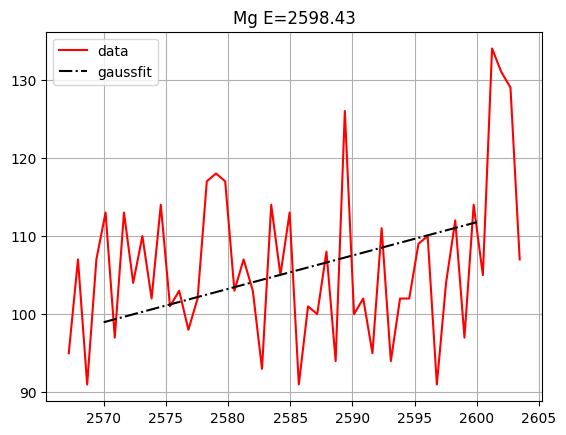

In [292]:
chs = []

chs += [getChannel("Mg E=846.77", Mg1,  1000, 1500, 750, 1000, [850, 10, 200])]
chs += [getChannel("Mg E=2085.0", Mg1, 2750, 2810, 2075,2090, [2080, 10, 200])]    
chs += [ getChannel("Mg E=1238.27", Mg1, 1500, 1800,1100,1300, [1230, 10, 200])]
chs += [ getChannel("Mg E=2657.54", Mg1, 3000, 4000, 2500,2800, [2650, 50, 5000])]
chs += [ getChannel("Mg E=1810.72", Mg1, 2300, 2600, 1750,1900,[1800, 10, 500])]
chs += [ getChannel("Mg E=2959.03", Mg1, 3800, 4100, 2900,3000, [2950, 10, 200])] 
chs += [getChannel("Mg E=3122.908", Mg1, 4100, 4270, 3000, 3200, [3120, 10, 200])]
chs += [ getChannel("Mg E=2113.09", Mg1, 2720, 3020, 2000,2200, [2120, 10, 200])]
chs += [ getChannel("Mg E=1037.833", Mg1, 1340, 1440,1020,1050, [1030, 10, 200])]
chs += [ getChannel("Mg E=3369.9", Mg1, 4100, 5400,3200, 3500, [3360, 10, 200])]
chs += [ getChannel("Mg E=2523.06", Mg1, 3200, 3600,2400,2600, [2500, 10, 200])]
chs += [ getChannel("Mg E=2598.43", Mg1, 3450, 3500,2570,2600, [2590, 10, 200])]

In [284]:
ch= np.array(chs)
ch

C:\Users\David\AppData\Local\Temp\ipykernel_12664\3110951003.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ch= np.array(chs)


array([[array([ 8.48253219e+02,  3.06465966e+00,  1.39794237e+05,  3.77463022e+00,
               -5.24147379e+03])                                                  ,
        array([2.71304001e-03, 2.02373820e-03, 1.45595792e+02, 1.88460749e-02,
               1.83176359e+01])                                               ,
        'Mg E=846.77'],
       [array([ 2.08827794e+03,  1.01591502e+02,  1.24373777e-03, -2.79703978e-01,
                3.02415605e+02])                                                  ,
        array([1.95018521e+08, 6.81632265e+07, 1.37283849e+03, 2.42002934e+01,
               5.01970927e+04])                                               ,
        'Mg E=2085.0'],
       [array([ 1.24047653e+03,  3.63829407e+00,  1.14441985e+02, -2.25675748e-01,
               -1.08276330e+03])                                                  ,
        array([5.75839892e-01, 5.80098739e-01, 1.58993696e+01, 3.32478346e-02,
               4.10915529e+01])                       

In [298]:
#A = H * Sigma \sqrt(2pi)

def Areal(t):
    H = t[2]
    Sigma = t[1]
    A = H * Sigma * (2*np.pi)**0.5
    return round(A)

Areals = [Areal(i) for i in ch[:,0]]
Areals

[1073894, 0, 1044, 3376, 149956, 1664, 24, 67550, 0, 597, 3306, 0]

In [299]:

(2.65-2.57)/2.57


0.03112840466926073

In [301]:
na = {}
for i in range(len(Areals)):
    na.update({chs[i][2][5:]: Areals[i]})

print(na)
E7 = na['2598.43']
E6 = na['3369.9'] + na['2523.06']
E5 = na['1037.833']
E4 = na['2959.03'] + na['2113.09']
E3 = na['2657.54'] + na['1810.72']
E2 = na['1238.27'] - na['1037.833']
E1 = na['846.77'] - na['1238.27'] - na['1810.72'] - na['2113.09'] - na['2523.06'] - na['2598.43']

E = E7, E6, E5, E4, E3, E2, E1

print(E)

{'846.77': 1073894, '2085.0': 0, '1238.27': 1044, '2657.54': 3376, '1810.72': 149956, '2959.03': 1664, '3122.908': 24, '2113.09': 67550, '1037.833': 0, '3369.9': 597, '2523.06': 3306, '2598.43': 0}
(0, 3903, 0, 69214, 153332, 1044, 852038)


In [302]:
# Det sidste resultat overfor er mænden af målte counts 
# i forskellige exciteret energier af Fe56.

